#### República Bolivariana de Venezuela
#### Universidad Centro Occidental Lisandro Alvarado
#### Decanato de Ciencias y Tecnología
#### Ingeniería de Producción

##### Martorana Milko G. C.I.: 24.305.350.
a
#### Barquisimeto, Mayo, 2022.

## Modelo de Regresión lineal Simple - Machine Learning

Probaremos como usar el modelo de regresión lineal con el codigo de programación de Python y Jupyter notebook para ir iterando.

Se predicira el resultado de una variable conocida y dependiente usando otra variable independiente.

#### Lectura de los datos

Supongamos que tenemos los datos de una empresa, donde está la cantidad gastada en diferentes tipos de anuncios y sus ventas posteriores.

Importo las librerias que necesitare.:

In [1]:
# Para obviar los errores al ejecutar.
import warnings
warnings.filterwarnings('ignore')

# Pandas
import numpy as np
import pandas as pd

Leo el archivo .csv con los datos de interes.

In [2]:
data_set = pd.read_csv("data_set.csv")
data_set.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


La variable de interes objetivo sera la columna Sales : Ventas.

#### Compresión del data set obtenido

Ejecutare un par de funciones para evaluar un poco mas los datos.:

In [3]:
data_set.shape

(200, 4)

Para evaluar si cuento con datos nulos.

In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Veamos si hay regularidades en los datos.

In [5]:
data_set.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


#### Grafiquemos los datos

Hare un driagrama de pares de todas las columnas para ver cuales se correlacionan mejor contra los valores de Venta.

In [6]:
#Importo las librerías para gráficar
import matplotlib.pyplot as plt 
import seaborn as sns

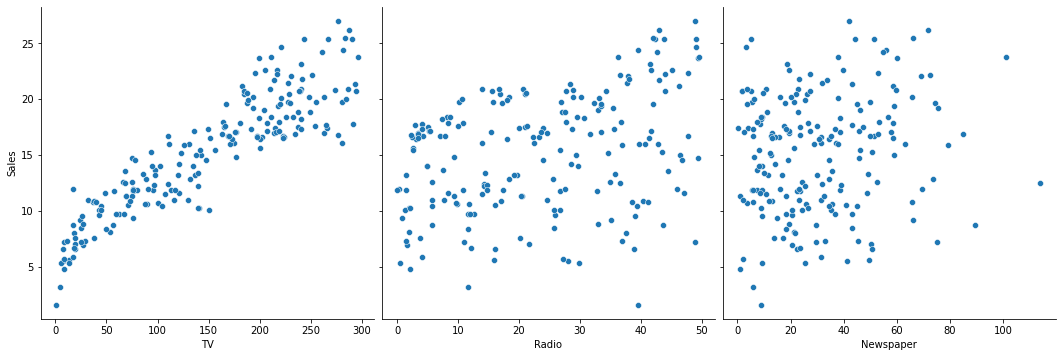

In [7]:
#Gráfico de pares
sns.pairplot(data_set, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', size=5, aspect=1, kind='scatter')
plt.show()

Apoyare el analisis usando un mapa de calor para visualizar los datos.

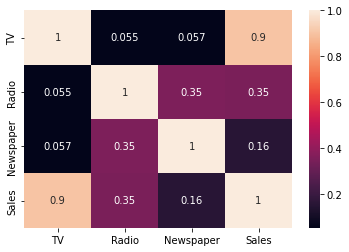

In [8]:
sns.heatmap(data_set.corr(), annot = True)
plt.show()

Podriamos decir que el campo TV esta mucho mas relacionado con Ventas que el resto. Asi que usaremos este campo como nuestra variable caracteristica.

Regresión Lineal Simple.: y = c + mX, donde X = TV como parametro del modelo. Ademas Y = Sales.

In [9]:
X = data_set['TV']
y = data_set['Sales']

#### Creo los conjuntos de entrenamiento y prueba

Divido en proporción de prueba 70% y entrenamiento 30% usando train_test.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size = 0.7, 
                                                    test_size = 0.3, 
                                                    random_state = 100)

Veamos.:

In [12]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [13]:
y_train

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
       ... 
87     16.0
103    19.7
67     13.4
24      9.7
8       4.8
Name: Sales, Length: 140, dtype: float64

### Entreno el modelo y construyo el modelo de regresión

In [14]:
import statsmodels.api as sm

In [15]:
X_train_sm = sm.add_constant(X_train)

Ajustare la línea de regresión usando el método Mínimos cuadrados.

In [16]:
# Ajusto
ajuste = sm.OLS(y_train, X_train_sm).fit()
ajuste.params

const    6.948683
TV       0.054546
dtype: float64

Veo todos los parametros ajustados como R²

In [17]:
ajuste.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.52e-52
Time:                        03:03:59   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Nos interesa los valores.:

1. El coeficiente con su respectivo P. (0.054 con un P muy bajo, por lo cual es significativo).
2. El R cuadrado. (0.816 donde el 86% de la varianza de las ventas se explican con la caracteristica TV).
3. Probabilidad con F estadistico. (Tiene un P practicamente de 0 por lo cual es significativo estadisticamente hablando).

Dado que el ajuste es significativo, avancemos y visualicemos qué tan bien se ajusta la línea recta al diagrama de dispersión entre las columnas TV y Ventas.

Ecuación de la recta.: Sales = 6.948 + 0.054 * TV

Visualizando la regresión lineal

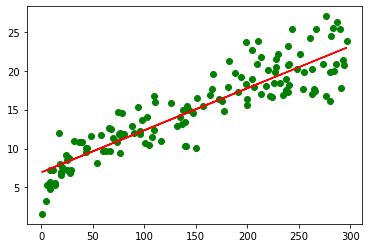

In [18]:
plt.scatter(X_train, y_train,color='green')
plt.plot(X_train, 6.948 + 0.054*X_train, 'r', color='red')
plt.show()

Antes de continuar con el modelo realizare un analisis residual: Error = Valor Actual - Valor Predecido

In [19]:
y_train_pred = ajuste.predict(X_train_sm)
residuo = (y_train - y_train_pred)

Debería ser normal su distribución.:

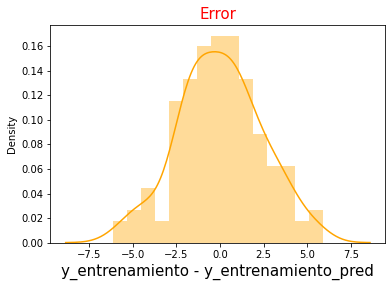

In [20]:
fig = plt.figure()
sns.distplot(residuo, bins = 15,color='orange')
plt.title('Error', fontsize = 15,color='red')
plt.xlabel('y_entrenamiento - y_entrenamiento_pred', fontsize = 15, color='black')
plt.show()

En efecto, siguen una distribución normal con media 0.

Pero ademas no debén seguir ningún patrón.:

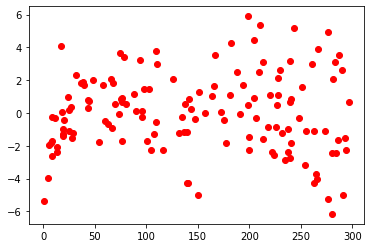

In [21]:
plt.scatter(X_train,residuo,color='red')
plt.show()

### Procedo a predecir sobre los datos

In [22]:
X_prueba_sm = sm.add_constant(X_test)
y_prueba_pred = ajuste.predict(X_prueba_sm)
y_prueba_pred

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
167    18.228745
116    14.541452
96     17.726924
52     18.752384
69     18.774202
164    13.341445
124    19.466933
182    10.014155
154    17.192376
125    11.705073
196    12.086893
194    15.114182
177    16.232370
163    15.866914
31     13.106899
11     18.659656
73     14.006904
15     17.606923
41     16.603281
97     17.034193
128    18.965113
133    18.937840
82     11.055978
139    17.034193
123    13.663265
83     10.679613
65     10.712340
151    13.548719
162    17.225103
170     9.675971
77     13.521446
32     12.250530
173    16.134188
174    19.079659
85     17.486923
168    18.697838
112    16.532372
171    15.921460
181    18.866930
7      13.505083
46     11.841437
75      7.870506
28     20.519667
29     10.799613
195     9.032331
40     17.994198
153    16.292371
115    11.045069
64     14.099631
59     18.441473
1       9.375969
192     7.886870
136     8.345054
152    17.7269

Calculare ahora el R cuadrado

In [23]:
from sklearn.metrics import r2_score
r_cuadrado = r2_score(y_test, y_prueba_pred)
r_cuadrado

0.792103160124566

0.79 contra 0.815 de los datos de entrenamiento. Es bastante estable, esta dentro del 5% de valaor de R cuadrado.

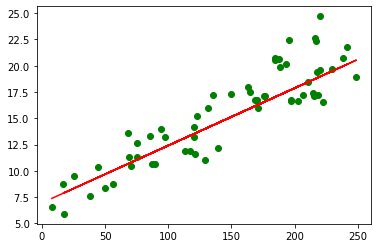

In [24]:
#Visualizo los datos de prueba.
plt.scatter(X_test, y_test,color='green')
plt.plot(X_test, y_prueba_pred, 'r')
plt.show()

Divido los datos en entrenamiento y prueba como hicimos anteriormente.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, 
                                                                train_size = 0.7, 
                                                                test_size = 0.3, 
                                                                random_state = 100)

In [27]:
X_train_lm.shape

(140,)

In [28]:
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(140, 1)
(60, 1)


In [29]:
lm = LinearRegression()
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

Ahora buscando el coeficiente del modelo

In [30]:
print("Intercept :",lm.intercept_)
print('Slope :',lm.coef_)

Intercept : 6.948683200001357
Slope : [0.05454575]


La ecuación de la recta para los valores anteriores.: Sales = 6.948 + 0.054 * TV (Es la misma).

In [31]:
# Hago las predición para la variable Y
y_entrenamiento_pred = lm.predict(X_train_lm)
y_prueba_pred = lm.predict(X_test_lm)

# Comparo el R cuadrado de ambos.
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_prueba_pred))

0.8157933136480389
0.7921031601245662


Sigue estando dentro del 8% de los valores de R cuadrado en los datos de entrenamiento.

In [32]:
pd.DataFrame(y_prueba_pred).to_csv("predicción_ventas_prueba.csv")

### Conclusión

Se logro predecir las ventas entrenando un modelo de regresión lineal con Machine Learning usando Python, entendiendo la variable caracteristica y la variable objetivo de nuestro modelo frente al problema (Las ventas) para la empresa con gastos variables según el tipo de anunción en los que invierte podremos predecir las ventas en función de cuando invierta por tipo de anuncio.